# **Test GPU**

In [1]:
import torch
print("Is CUDA enabled GPU Available?", torch.cuda.is_available())
print("GPU Number:", torch.cuda.device_count())
print("Current GPU Index:", torch.cuda.current_device())
print("GPU Type:", torch.cuda.get_device_name(device=None))
print("GPU Capability:", torch.cuda.get_device_capability(device=None))
print("Is GPU Initialized yet?", torch.cuda.is_initialized())
print(torch.__version__)

Is CUDA enabled GPU Available? True
GPU Number: 1
Current GPU Index: 0
GPU Type: NVIDIA GeForce RTX 3080 Ti Laptop GPU
GPU Capability: (8, 6)
Is GPU Initialized yet? True
2.1.2+cu121


In [2]:
import tensorflow as tf
print(tf.__version__)
print(tf.config.experimental.list_physical_devices())
print(tf.config.list_physical_devices('GPU'))

2024-11-14 21:58:50.629463: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-14 21:58:50.750611: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-14 21:58:50.750701: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-14 21:58:50.765117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-14 21:58:50.819397: I tensorflow/core/platform/cpu_feature_guar

2.15.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-11-14 21:58:53.285922: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 21:58:53.327542: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-14 21:58:53.327571: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


# **Install Dependencies and Import**

In [ ]:
!pip install imblearn
!pip install missingpy
!pip install sweetviz
!pip install xgboost
!pip install catboost
!pip install lightgbm
!pip install sklearn-genetic
!pip install MissForest

In [3]:
import os
import re
import sys
import h5py
import time
import scipy
import random
import pickle
import json
import math
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib as mpl
import tensorflow as tf
import xgboost as xgb
import catboost as cb
import sweetviz as sv
import sklearn.neighbors._base
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import *
from pathlib import Path
from tqdm import tqdm
from scipy import stats, signal
from os.path import join as pjoin
from matplotlib.colors import ListedColormap
from sklearn import metrics, preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split, KFold, cross_val_predict, cross_val_score, LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix,  multilabel_confusion_matrix, root_mean_squared_error
from sklearn.metrics import f1_score, roc_curve, auc, recall_score, make_scorer, precision_score, accuracy_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Lasso, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer as MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import Pipeline
from scipy import interp
from imblearn.over_sampling import SMOTE, RandomOverSampler
from missingpy import MissForest
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from genetic_selection import GeneticSelectionCV
%matplotlib inline
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
warnings.filterwarnings("ignore")
lb = preprocessing.LabelBinarizer()

/root/miniconda3/envs/wsl_miniconda_env1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
def missing_imputaion(x, imputer='none'):
    xt=x
    if imputer=='knn':
        
        X = xt
        imputer = KNNImputer(n_neighbors=2, weights="uniform")
        Knn_data=imputer.fit_transform(X)
        X1=pd.DataFrame(Knn_data)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    elif imputer=='mice':
        Mice_data=MICE().fit_transform(xt)
        X1=pd.DataFrame(Mice_data)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    elif imputer=='randomforest':
        imputer = MissForest()
        Rf = imputer.fit_transform(xt)
        X1=pd.DataFrame(Rf)
        y1=list(xt.columns.values)
        X1.columns=y1
        return X1
    else:
        X1=xt.dropna(axis=0)
        return(X1)

def get_leave_one_out_cv(data_input_local, label_input_local, resample_condition_input_local=True, return_type='index'):
    smote_object_local = SMOTE()
    index_local = data_input_local.columns
    #data_input_local = data_input_local.values
    data_input_local = StandardScaler().fit_transform(data_input_local)
    data_input_local = np.array(data_input_local)
    label_input_local = np.array(label_input_local)

    fold_object_local = LeaveOneOut()
    fold_object_local.get_n_splits(data_input_local)

    if return_type=='index':
        fold_num_local = 0
        fold_index_dict_local = {}
        for train_index_local, test_index_local in fold_object_local.split(data_input_local, label_input_local):
            train_index_local, val_index_local = train_test_split(train_index_local, test_size=0.2)
            fold_index_dict_local[fold_num_local] = [train_index_local, val_index_local, test_index_local]
            fold_num_local = fold_num_local + 1

        return fold_index_dict_local

    if return_type == 'data':
        smote_object_local = SMOTE()

        data_train_list_local = []
        label_train_list_local = []
        data_test_list_local = []
        label_test_list_local = []
        for train_index_local, test_index_local in fold_object_local.split(data_input_local, label_input_local):
            each_data_train_list_local = data_input_local[train_index_local]
            each_label_train_list_local = label_input_local[train_index_local]

            each_data_test_list_local = data_input_local[test_index_local]
            each_label_test_list_local = label_input_local[test_index_local]

            if resample_condition_input_local == True:
                each_data_train_list_local, each_label_train_list_local = smote_object_local.fit_resample(each_data_train_list_local, each_label_train_list_local)

            data_train_list_local.append(each_data_train_list_local)
            label_train_list_local.append(each_label_train_list_local)
            data_test_list_local.append(each_data_test_list_local)
            label_test_list_local.append(each_label_test_list_local)

        fold_data_dict_local = {'data': (data_train_list_local, data_test_list_local, label_train_list_local, label_test_list_local), 'index': index_local}
        return fold_data_dict_local

def cv_fold(X1, yt, n_splits=5, shuffle=False):
    import numpy as np
    from sklearn.model_selection import StratifiedKFold
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler
    smote=SMOTE()
    cc=X1.columns
    xx1 = StandardScaler().fit_transform(X1)
    X=np.array(xx1)
    y=np.array(yt)
    skf = StratifiedKFold(n_splits=n_splits, random_state=None, shuffle=shuffle)
    skf.get_n_splits(X, y)
    xtrain=[]
    xtest=[]
    ytrain=[]
    ytest=[]
    for train_index, test_index in skf.split(X, y):
            X_train, X_test = X[train_index], X[test_index]

            y_train, y_test = y[train_index], y[test_index]
            x1,y1= smote.fit_resample(X_train, y_train)
            xtrain.append(x1)
            xtest.append(X_test)
            ytrain.append(y1)
            ytest.append(y_test)
    d={'data':(xtrain,xtest,ytrain,ytest),'index':cc}
    return d

def feature_ranking(x, y):
        # Non-genetic Feature Ranking
        mdl=[]
        mdl.append(xgb.XGBClassifier(max_depth=4,
                                    learning_rate=0.2,
                                    reg_lambda=1,
                                    n_estimators=150,
                                    subsample=0.9,
                                    colsample_bytree=0.9))
        mdl.append(RandomForestClassifier(n_estimators=50,
                                          max_depth=10,
                                          random_state=0,
                                          class_weight=None,
                                          n_jobs=-1))
        mdl.append(ExtraTreesClassifier())
        ml1=['XGBoost','Random_Forest','Extra_Tree']
        feat_sel=[]
        for i in range(3):
            model = mdl[i]
            model.fit(x, y)
            importances = model.feature_importances_
            indices = np.argsort(importances)[::-1]
            feat_labels = x.columns
            print("Feature Ranking:") 
            sel_feat=[]
            for f in range(x.shape[1]):
                    print("%d. Feature no: %d - Feature name: %s (%f)" % (f+1, indices[f], feat_labels[indices[f]], importances[indices[f]]))
                    sel_feat.append(feat_labels[indices[f]])
            top_n = 30
            feat_sel.append(sel_feat)
            indices = indices[0:top_n]
            plt.subplots(figsize=(6, 10))
            pal = sns.color_palette("magma", top_n)
            g = sns.barplot(x=importances[indices], 
                            y=feat_labels[indices], 
                            orient='h', 
                            palette=pal, 
                            label='small', 
                            width=0.5,
                            gap=2.75,
                            fill=True)
            for k in range(0,top_n):
                g.bar_label(g.containers[k], fmt="%.4f", fontsize=10)
            g.set_title(f'Top {top_n} Ranked Features by ' +ml1[i], fontsize=16)
            g.set_xlabel("Relative Importance", fontsize=12)
            g.set_ylabel("Features", fontsize=12)
            g.tick_params(labelsize=12)
            sns.despine() 
            # plt.savefig('feature_importances_v3.png')
            plt.savefig(f'Top {top_n} Ranked Features by '+ml1[i], 
                        transparent=False,
                        bbox_inches='tight',
                        dpi=600)
            plt.show()
            plt.close()
            print('-----------------------------------------------------------------')
        xgboost = feat_sel[0]
        randomforest = feat_sel[1]
        extratree = feat_sel[2]
        
        return(xgboost, randomforest, extratree)
    
def models():
    clf = []
    clf.append(('MLP', MLPClassifier(hidden_layer_sizes=(13,13,13),
                             activation='tanh',
                             solver='adam',
                             learning_rate='adaptive',
                             learning_rate_init=0.001,
                             max_iter=2000)))
    clf.append(('GradBoost', GradientBoostingClassifier(loss='log_loss',
                                          n_estimators=100,
                                          learning_rate=0.1,
                                          max_depth=3,
                                          criterion='friedman_mse')))
    clf.append(('XGBoost', XGBClassifier(n_estimators=350,
                             max_depth=2,
                             iterations=1000,
                             num_leaves=31,
                             learning_rate=0.1,
                             loss_function='Logloss',
                             objective='binary:logistic')))
    clf.append(('CatBoost', cb.CatBoostClassifier(logging_level='Silent')))
    clf.append(('LightGBM', LGBMClassifier(boosting_type='gbdt',
                              n_estimators=300,
                              learning_rate=0.1, 
                              verbosity=-1)))
    clf.append(('AdaBoost', AdaBoostClassifier(n_estimators=75,
                                  algorithm='SAMME.R',
                                  learning_rate=0.1)))
    clf.append(('SVM', SVC(kernel='rbf',
                   degree=3,
                   gamma='auto',
                   probability=True)))
    clf.append(('RandomForest', RandomForestClassifier(n_estimators=1000,
                                      criterion='gini',
                                      max_features='sqrt')))
    clf.append(('ExtraTrees', ExtraTreesClassifier(n_estimators=300,
                                    criterion='gini',
                                    max_features='sqrt',
                                    bootstrap=True)))
    clf.append(('KNeighbors', KNeighborsClassifier(n_neighbors=13,
                                    weights='uniform')))
    clf.append(('LDA', LinearDiscriminantAnalysis(solver='svd')))
    clf.append(('LogisticRegression', LogisticRegression(penalty='l2',
                                  tol=0.00001,
                                  solver='lbfgs',
                                  class_weight='balanced')))
    clf.append(('Ridge', RidgeClassifier(tol=0.0001,
                               solver='svd',
                               class_weight='balanced')))
    return clf   
    
def feature_selection_genetic(x, y, num_of_max_feature_for_genetic_extractor):
        # Genetic Feature Selection
        # estimator = DecisionTreeClassifier()
        # clf = models()
        estimator = DecisionTreeClassifier(max_depth=6)
        model = GeneticSelectionCV(estimator,
                                   cv=10,
                                   verbose=0,
                                   scoring="accuracy",
                                   max_features=num_of_max_feature_for_genetic_extractor,
                                   n_population=100,
                                   crossover_proba=0.5,
                                   mutation_proba=0.2,
                                   n_generations=50,
                                   crossover_independent_proba=0.5,
                                   mutation_independent_proba=0.04,
                                   tournament_size=3,
                                   n_gen_no_change=10,
                                   caching=True,
                                   n_jobs=-1)
        model = model.fit(x,y)
        genetic_features_selected = list(x.columns[model.support_])
        print('****************Genectic Evolution Based Feature Selection****************')
        print("Number of Selected Features: " + str(len(genetic_features_selected)))
        print("Features: ")
        iter = 1
        for each_feature in genetic_features_selected:
          print(str(iter) + ". " + each_feature)
          iter = iter + 1
        print('-----------------------------------------------------------------')
        return genetic_features_selected

def classification_with_top_feature(xtrain, 
                                    ytrain, 
                                    xtest, 
                                    ytest, 
                                    feature_num, 
                                    features_selected_ranked, 
                                    classifier, 
                                    feat_increment):
    # xtrain, xtest, ytrain, ytest = data['data']
    # ind = data['index'].to_list()
    ind = xtrain.columns
    num_feat = feature_num
    fsm = features_selected_ranked
    clf = models()
    if classifier=='all':
        l=0
        for c in range(13):
            clf1 = clf[l][1]
            a=[]
            p=[]
            r=[]
            s=[]
            f=[]
            # prb=[]
            pred=[]
            tar=[]
            mean_tpr=[]
            mean_auc=[]
            feat=[]
            for i in list(range(0,num_feat,feat_increment)):
                # y_pred=[]
                # y2=[]
                tl=fsm[0:i+1]  #feature increasing
                tprs = []
                aucs = []
                mean_fpr = np.linspace(0,1,100)
                # probs=[]
                # total_fold_num = len(xtrain)
                # for k in range(total_fold_num):
                # x11=pd.DataFrame(xtrain)
                xtrain.columns=ind
                x1=xtrain[tl]
                y1=ytrain  
                model = clf1.fit(np.array(x1),np.array(y1))
                # model = clf1.fit(x[train],y.iloc[train])
                # xts=pd.DataFrame(xtest)
                xtest.columns=ind
                xt1=xtest[tl]
                y_pred=model.predict(xt1)
                # y_prob=model.predict_proba(np.array(xt1))
                # y_pred.extend(y_pr)
                # y2.extend(ytest)
                # y21=ytest
                # y_pred1=y_pred
                # probs.append(y_prob)
                categories=list(pd.Series(ytest).unique())   
                # main confusion matrix
                cm = confusion_matrix(ytest, y_pred)
                # cm_per_class: it returns a 2x2 confusion matrix for each class, where 'i' represnt  class index
                # cm_per_class[i][0][0]:TN,   cm_per_class[i][0][1]:FP,   cm_per_class[i][1][0]:FN,    cm_per_class[i][1][1]:TP   
                cm_per_class = multilabel_confusion_matrix(ytest, y_pred)
                # Overall Accuracy
                Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
                Overall_Accuracy = round(Overall_Accuracy*100, 2)
                # create confusion matrix table (pd.DataFrame)
                # cm_table = pd.DataFrame(cm, index=categories , columns=categories)
                if (i+1)!=1:
                    feature_no= 'top_'+str(i+1)+'_features'
                else:
                    feature_no= 'top_'+str(i+1)+'_feature'
                try:
                    Eval_Mat = []
                    # per class metricies
                    for i in range(len(categories)):
                        TN = cm_per_class[i][0][0] 
                        FP = cm_per_class[i][0][1]   
                        FN = cm_per_class[i][1][0]  
                        TP = cm_per_class[i][1][1]  
                        Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                        Precision = round(100*(TP)/(TP+FP), 2)
                        Sensitivity = round(100*(TP)/(TP+FN), 2) 
                        F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)  
                        Specificity = round(100*(TN)/(TN+FP), 2)  
                        Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
                    # sizes of each class
                    s2 = np.sum(cm,axis=1) 
                    # create tmep excel table 
                    headers=['Accuracy', 'Precision', 'Recall', 'F1_Score', 'Specificity']
                    temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
                    # weighted average of per class metricies
                    ac = Overall_Accuracy
                    # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2) 
                    pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)  
                    rc = round(temp_table['Recall'].dot(s2)/np.sum(s2), 2)  
                    f1 = round(temp_table['F1_Score'].dot(s2)/np.sum(s2), 2)  
                    sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)  
                except:
                    ac = 'NaN'
                    pr = 'NaN'
                    rc = 'NaN'
                    f1 = 'NaN'
                    sp = 'NaN'
                a.append(ac)
                p.append(pr)
                r.append(rc)
                f.append(f1)
                s.append(sp)
                feat.append(feature_no)
                # prb.append(probs)
                pred.append(y_pred)
                tar.append(ytest) 
            Result=pd.concat([pd.DataFrame(a), pd.DataFrame(p), pd.DataFrame(r), pd.DataFrame(f), pd.DataFrame(s)], axis=1, join="inner")
            Result.columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
            Result.index= feat
            # Print and Save Results
            print('---------------------------------------------------------------------')
            print('Result for '+clf[l][0]+' classifier')
            print('---------------------------------------------------------------------')
            print(Result)
            Result.to_csv('Results_Classification/'+clf[l][0]+'_Occp_Classification_Stacked.csv')
            print('---------------------------------------------------------------------')
            l=l+1
        return (Result, tar, pred)
    else:
        clf1 = clf[classifier][1] # model 0=MLP, 1=GradBoost, 2=XGBoost, 3=CatBoost, 4=LGBM, 5=AdaBoost, 6=SVM, 7=RandomForest, 8=KNN, 9=LDA, 10=LogisticRegression, 11=ElasticNet, 12=Ridge
        l = classifier
        a=[]
        p=[]
        r=[]
        s=[]
        f=[]
        prb=[]
        pred=[]
        tar=[]
        mean_tpr=[]
        mean_auc=[]
        feat=[]
        for i in list(range(0,num_feat,feat_increment)):
            # y_pred=[]
            # y2=[]
            tl=fsm[0:i+1]
            tprs = []
            aucs = []
            mean_fpr = np.linspace(0,1,100)
            probs=[]
            # total_fold_num = len(xtrain)
            # for k in range(total_fold_num):
            x11=pd.DataFrame(xtrain)
            x11.columns=ind
            x1=x11[tl]
            y1=ytrain
            model = clf1.fit(np.array(x1),np.array(y1))
            #model = clf1.fit(x[train],y.iloc[train])
            xts=pd.DataFrame(xtest)
            xts.columns=ind
            xt1=xts[tl]
            y_pred=model.predict(np.array(xt1))
            y_prob=model.predict_proba(np.array(xt1))
            # y_pred.extend(y_pr)
            # y2.extend(ytest)
            # y21=y2
            # y_pred1=y_pred
            probs.append(y_prob)
            categories=list(pd.Series(ytest).unique())                   
            # main confusion matrix
            cm = confusion_matrix(ytest, y_pred)
            cm_per_class = multilabel_confusion_matrix(ytest, y_pred)
            # Overall Accuracy
            Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
            Overall_Accuracy = round(Overall_Accuracy*100, 2)
            # create confusion matrix table (pd.DataFrame)
            # cm_table = pd.DataFrame(cm, index=categories , columns=categories)
            if (i+1)!=1:
                feature_no= 'top_'+str(i+1)+'_features'
            else:
                feature_no= 'top_'+str(i+1)+'_feature'
            try:
                Eval_Mat = []
                # per class metricies
                for i in range(len(categories)):
                    TN = cm_per_class[i][0][0] 
                    FP = cm_per_class[i][0][1]   
                    FN = cm_per_class[i][1][0]  
                    TP = cm_per_class[i][1][1]  
                    Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                    Precision = round(100*(TP)/(TP+FP), 2)  
                    Sensitivity = round(100*(TP)/(TP+FN), 2) 
                    F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)  
                    Specificity = round(100*(TN)/(TN+FP), 2)  
                    Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
                # sizes of each class
                s2 = np.sum(cm,axis=1) 
                # create tmep excel table 
                headers=['Accuracy', 'Precision', 'Recall', 'F1_Score', 'Specificity']
                temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
                # weighted average of per class metricies
                ac = Overall_Accuracy
                # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2) 
                pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)  
                rc = round(temp_table['Recall'].dot(s2)/np.sum(s2), 2)  
                f1 = round(temp_table['F1_Score'].dot(s2)/np.sum(s2), 2)  
                sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)  
            except:
                ac = 'NaN'
                pr = 'NaN'
                rc = 'NaN'
                f1 = 'NaN'
                sp = 'NaN'
            a.append(ac)
            p.append(pr)
            r.append(rc)
            f.append(f1)
            s.append(sp)
            feat.append(feature_no)
            prb.append(probs)
            pred.append(y_pred)
            tar.append(ytest)               
        Result=pd.concat([pd.DataFrame(a), pd.DataFrame(p), pd.DataFrame(r), pd.DataFrame(f), pd.DataFrame(s)], axis=1, join="inner")
        Result.columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
        Result.index= feat
        # Print and Save Results
        print('---------------------------------------------------------------------')
        print('Result for '+clf[l][0]+' classifier')
        print('---------------------------------------------------------------------')
        print(Result)
        Result.to_csv('Results_Classification/'+clf[l][0]+'_Occp_Classification_Stacked.csv')
        # bl=l+1
        print('---------------------------------------------------------------------')     
        return (Result, prb, tar, pred)

def process_data(ml1, ml2, ml3, td2):
    xts=[]
    xtr=[]
    yts=[]
    ytr=[]
    prf=[]
    for i in range(0):
      pl=np.concatenate((ml1[i],ml2[i],ml3[i]),1)
      prf.append(pl)
    for j in range(5):
      if j==1:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[2],td2[3],td2[4],td2[0]),1))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[2],prf[3],prf[4],prf[0]),0))
      elif j==2:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[1],td2[3],td2[4],td2[0]),1))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[1],prf[3],prf[4],prf[0]),0))
      elif j==3:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[1],td2[2],td2[4],td2[0]),1))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[1],prf[2],prf[4],prf[0]),0))
      elif j==4:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[1],td2[3],td2[2],td2[0]),1))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[1],prf[3],prf[2],prf[0]),0))
      elif j==0:
        yts.append(td2[j])
        ytr.append(np.concatenate((td2[1],td2[3],td2[2],td2[4]),1))
        xts.append(prf[j])
        xtr.append(np.concatenate((prf[1],prf[3],prf[2],prf[4]),0))
    return xtr,xts,ytr,yts

def estimator_models_HF():
    clf = []
    clf.append(('GradBoost', GradientBoostingClassifier(loss='log_loss',
                                          n_estimators=100,
                                          learning_rate=0.1,
                                          max_depth=3,
                                          criterion='friedman_mse',
                                          random_state=0)))
    clf.append(('CatBoost', cb.CatBoostClassifier(logging_level='Silent')))
    clf.append(('XGBoost', XGBClassifier(n_estimators=350,
                                            max_depth=2,
                                            learning_rate=0.1,
                                            objective='binary:logistic')))
    clf.append(('ExtraTrees', ExtraTreesClassifier(n_estimators=300,
                                    criterion='gini',
                                    max_features='sqrt',
                                    bootstrap=True)))
    clf.append(('MLP', MLPClassifier(hidden_layer_sizes=(13,13,13),
                             activation='tanh',
                             solver='adam',
                             learning_rate='adaptive',
                             learning_rate_init=0.001,
                             max_iter=2000)))
    return clf

def classification_ensembled(xtrain,
                            ytrain,
                            xtest,
                            ytest,
                            feature_num,
                            features_selected_ranked,
                            feat_increment,
                            ensemble_type='Stacking'):
    ind = xtrain.columns
    num_feat = feature_num
    fsm = features_selected_ranked
    clf = estimator_models_HF()
    if ensemble_type == 'Stacking':
        FE = MLPClassifier(hidden_layer_sizes=(13,13,13),
                             activation='tanh',
                             solver='adam',
                             learning_rate='adaptive',
                             learning_rate_init=0.001,
                             max_iter=2000)
        SC = StackingClassifier(estimators=clf, 
                                final_estimator=FE, 
                                cv=5, 
                                passthrough=False, 
                                n_jobs=-1)
    elif ensemble_type == 'Voting':
        SC = VotingClassifier(estimators=clf, voting='soft', n_jobs=-1)
    elif ensemble_type == 'Bagging':
        FE = ExtraTreesClassifier(criterion='gini', 
                                  max_features='sqrt', 
                                  bootstrap=True)
        SC = BaggingClassifier(estimator=FE, n_estimators=10, random_state=0)
    else:
        print('Choose a proper ensembling method.')
    a=[]
    p=[]
    r=[]
    s=[]
    f=[]
    # prb=[]
    pred=[]
    tar=[]
    feat=[]
    for i in list(range(0,num_feat,feat_increment)):
        print(i)
        tl=fsm[0:i+1]  # feature increasing
        probs=[]
        xtrain.columns=ind
        x1=xtrain[tl]
        y1=ytrain  
        model = SC.fit(np.array(x1),np.array(y1))
        xtest.columns=ind
        xt1=xtest[tl]
        y_pred=model.predict(xt1)
        # y_prob=model.predict_proba(np.array(xt1))
        # probs.append(y_prob)
        categories=list(pd.Series(ytest).unique())   
        # Confusion Matrix
        cm = confusion_matrix(ytest, y_pred)
        cm_per_class = multilabel_confusion_matrix(ytest, y_pred)
        # Overall Accuracy
        Overall_Accuracy = np.sum(np.diagonal(cm)) / np.sum(cm)
        Overall_Accuracy = round(Overall_Accuracy*100, 2)
        # create confusion matrix table (pd.DataFrame)
        # cm_table = pd.DataFrame(cm, index=categories , columns=categories)
        if (i+1)!=1:
            feature_no= 'top_'+str(i+1)+'_features'
        else:
            feature_no= 'top_'+str(i+1)+'_feature'
        try:
            Eval_Mat = []
            # per class metricies
            for i in range(len(categories)):
                TN = cm_per_class[i][0][0] 
                FP = cm_per_class[i][0][1]   
                FN = cm_per_class[i][1][0]  
                TP = cm_per_class[i][1][1]  
                Accuracy = round(100*(TP+TN)/(TP+TN+FP+FN), 2)
                Precision = round(100*(TP)/(TP+FP), 2)
                Sensitivity = round(100*(TP)/(TP+FN), 2) 
                F1_score = round((2*Precision*Sensitivity)/(Precision+Sensitivity), 2)  
                Specificity = round(100*(TN)/(TN+FP), 2)  
                Eval_Mat.append([Accuracy, Precision, Sensitivity, F1_score, Specificity])
            # sizes of each class
            s2 = np.sum(cm,axis=1) 
            # create tmep excel table 
            headers=['Accuracy', 'Precision', 'Recall', 'F1_Score', 'Specificity']
            temp_table = pd.DataFrame(Eval_Mat, index=categories ,columns=headers)
            # weighted average of per class metricies
            ac = Overall_Accuracy
            # ac = round(temp_table['Accuracy'].dot(s)/np.sum(s), 2) 
            pr = round(temp_table['Precision'].dot(s2)/np.sum(s2), 2)  
            rc = round(temp_table['Recall'].dot(s2)/np.sum(s2), 2)  
            f1 = round(temp_table['F1_Score'].dot(s2)/np.sum(s2), 2)  
            sp = round(temp_table['Specificity'].dot(s2)/np.sum(s2), 2)  
        except:
            ac = 'NaN'
            pr = 'NaN'
            rc = 'NaN'
            f1 = 'NaN'
            sp = 'NaN'
        a.append(ac)
        p.append(pr)
        r.append(rc)
        f.append(f1)
        s.append(sp)
        feat.append(feature_no)
        # prb.append(probs)
        pred.append(y_pred)
        tar.append(ytest) 
    Result=pd.concat([pd.DataFrame(a), pd.DataFrame(p), pd.DataFrame(r), pd.DataFrame(f), pd.DataFrame(s)], axis=1, join="inner")
    Result.columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
    Result.index=feat
    # Print and Save Results
    print('---------------------------------------------------------------------')
    print(f'Result for {ensemble_type} Classifier')
    print('---------------------------------------------------------------------')
    print(Result)
    Result.to_csv(f'Results_Classification/Occp_Classification_{ensemble_type}.csv')
    print('---------------------------------------------------------------------')
    return (Result, tar, pred)

# **Feature Ranking and Selection**

Load Dataset

In [5]:
Features_F1 = pd.read_excel(f'Features_Test_Fold1.xlsx', index_col=None)
Features_F2 = pd.read_excel(f'Features_Test_Fold2.xlsx', index_col=None)
Features_F3 = pd.read_excel(f'Features_Test_Fold3.xlsx', index_col=None)
Features_F4 = pd.read_excel(f'Features_Test_Fold4.xlsx', index_col=None)
Features_F5 = pd.read_excel(f'Features_Test_Fold5.xlsx', index_col=None)
Labels = Features_F1.columns
Features_All = pd.concat([Features_F1,Features_F2,Features_F3,Features_F4,Features_F5], axis=0, join='inner', keys=Labels, ignore_index=True)
X_All = Features_All.drop(['Target'], axis=1)
Y_All = Features_All['Target']
X_Labels = X_All.columns
X_All_Val = X_All.values
min_max_scaler = preprocessing.MinMaxScaler()
X_All_Val = min_max_scaler.fit_transform(X_All_Val)
X_All = pd.DataFrame(X_All_Val, columns=X_Labels)
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_All.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_All.columns.values]
print(X_All.shape)
print(Y_All.shape)
X_All.head(10)

(3753, 506)
(3753,)


,FirstDifference,SecondDifference,AverageAmplitudeChange,ArithmeticMean,AutoRegressiveModel,AbsoluteValueOfTheSummationOfExpRoot,AbsoluteValueOfTheSummationOfSquareRoot,AverageEnergy,CoefficientOfVariation,DifferenceAbsoluteMeanValue,...,Deep_Feature_254,Deep_Feature_255,year,quarter,season,month,week,day,weekend,hour
0,0.043369,0.035148,0.043369,0.057965,0.456901,0.065416,0.152607,0.003918,0.094544,0.043369,...,0.139774,0.440055,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
1,0.042097,0.034410,0.042097,0.056684,0.456881,0.065171,0.149347,0.003839,0.101467,0.042097,...,0.174831,0.445199,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
2,0.041262,0.033834,0.041262,0.055397,0.456986,0.063576,0.146066,0.003759,0.108285,0.041262,...,0.204934,0.432161,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
3,0.032630,0.025175,0.032630,0.053288,0.446766,0.060576,0.141250,0.003569,0.111408,0.032630,...,0.239313,0.432289,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
4,0.031319,0.024408,0.031319,0.051026,0.446846,0.061145,0.135972,0.003398,0.118596,0.031319,...,0.273673,0.433677,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
5,0.030896,0.024212,0.030896,0.048506,0.447646,0.060799,0.129541,0.003227,0.129041,0.030896,...,0.311094,0.425823,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
6,0.038032,0.032248,0.038032,0.046990,0.492455,0.061070,0.125936,0.003135,0.136539,0.038032,...,0.335467,0.420507,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
7,0.037384,0.031876,0.037384,0.045290,0.492599,0.061067,0.122114,0.003000,0.140485,0.037384,...,0.370272,0.415769,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
8,0.036478,0.031279,0.036478,0.043548,0.492839,0.062152,0.118175,0.002862,0.144445,0.036478,...,0.410648,0.412499,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2
9,0.034783,0.030062,0.034783,0.042299,0.492744,0.064415,0.115237,0.002772,0.148242,0.034783,...,0.445695,0.417644,0.0,0.0,0.666667,0.545455,0.8,0.0,0.966667,0.2


Remove highly correlated features

In [6]:
cor_matrix = X_All.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
print(to_drop)
X_All_HCE = X_All.drop(to_drop, axis=1)
print(X_All_HCE.shape)
New_labels = X_All_HCE.columns
# plt.subplots(figsize=(24, 24))
# res = sns.heatmap(X_Train_HCE.corr(), annot=True, annot_kws={"size": 10})
# res.set_xticklabels(res.get_xmajorticklabels(), fontsize=14)
# res.set_yticklabels(res.get_ymajorticklabels(), fontsize=14)

['SecondDifference', 'AverageAmplitudeChange', 'AbsoluteValueOfTheSummationOfExpRoot', 'AbsoluteValueOfTheSummationOfSquareRoot', 'AverageEnergy', 'DifferenceAbsoluteMeanValue', 'DifferenceAbsoluteStandardDeviationValue', 'DominantFrequencyFeatures_Maxval', 'DPratioBurgs', 'DPratioLombScale', 'DPratioMultitaper', 'DPratioPeriodogram', 'DPratioPyulear', 'DPratioWelch', 'DifferenceVarianceValue', 'EnhancedMeanAbsoluteValue', 'EntropyBubble', 'EntropyDispersion_RDE', 'EntropyFuzzy', 'EntropyGriddedDistribution_Aix', 'EntropyLogEnergy', 'EntropyPhase', 'EntropyPermutation', 'EntropyShannon', 'EntropySpectral_BandEn', 'EntropyTsallis', 'EnvelopeFeatures_f4X', 'EntropyWavelet_2', 'EntropyWavelet_3', 'EntropyWavelet_4', 'EntropyWavelet_5', 'EntropyWavelet_6', 'EntropyWavelet_7', 'EntropyWavelet_8', 'EntropyWavelet_11', 'EntropyWavelet_12', 'EntropyWavelet_15', 'EntropyWavelet_16', 'EntropyWavelet_17', 'EntropyWavelet_18', 'EntropyWavelet_19', 'EntropyWavelet_20', 'EntropyWavelet_21', 'Entropy

Select Features - Genetic Feature Selection

In [ ]:
num_of_max_feature_for_genetic_extractor = X_All_HCE.shape[1]
genetic_features_selected = feature_selection_genetic(X_All_HCE, Y_All, num_of_max_feature_for_genetic_extractor)
to_drop = [x for x in genetic_features_selected if x not in New_labels]
X_All_Selected_Gen = X_All_HCE.drop(to_drop, axis=1)
X_All_Selected_Gen = X_All_Selected_Gen.reindex(labels=None, index=None, columns=genetic_features_selected)
print(X_All_Selected_Gen.shape)
X_All_Selected_Gen.head(10)
X_All_Selected_Gen.to_csv('Feature_Selected_Data.csv', columns=genetic_features_selected, index=False)

Combine 80% and 90% Features and Remove Duplicates to get Final 90% (Done!)

In [7]:
X_Selected_Gen_80 = pd.read_csv('Feature_Selected_Data_80.csv')
print(X_Selected_Gen_80.shape)
X_Selected_Gen_90 = pd.read_csv('Feature_Selected_Data_90.csv')
print(X_Selected_Gen_90.shape)
X_All_Selected_Gen_Cat = pd.concat([X_Selected_Gen_80,X_Selected_Gen_90], axis=1)
print(X_All_Selected_Gen_Cat.shape)
X_All_Selected_Gen = X_All_Selected_Gen_Cat.loc[:,~X_All_Selected_Gen_Cat.columns.duplicated()].copy()
X_All_Selected_Gen.to_csv('Feature_Selected_Data_80_90.csv', index=False)
print(X_All_Selected_Gen.shape)
X_All_Selected_Gen_Cat.head(10)

(3649, 46)
(3649, 109)
(3649, 155)
(3649, 109)


,FirstDifference,AutoRegressiveModel,DPratioBurgs,DPratioLombScale,DPratioPeriodogram,EntropyGriddedDistribution_Gix,EntropyGriddedDistribution_Six,EnvelopeFeatures_f1X,EnvelopeFeatures_f3X,EntropyWavelet_10,...,Deep_Feature_205,Deep_Feature_206,Deep_Feature_216,Deep_Feature_222,Deep_Feature_232,Deep_Feature_234,Deep_Feature_243,Deep_Feature_248,Deep_Feature_254,year
0,0.580933,0.647312,0.387503,0.320937,0.404695,0.762269,0.980587,0.193632,0.034196,0.729475,...,0.206558,0.028599,0.371922,0.215981,0.270813,0.162501,0.318754,0.100002,0.121016,0
1,0.583438,0.641617,0.391278,0.295825,0.419754,0.762834,0.980531,0.192960,0.017132,0.752898,...,0.233166,0.039668,0.385778,0.223043,0.291807,0.163872,0.302997,0.102499,0.135177,0
2,0.588226,0.642489,0.393699,0.350912,0.429840,0.761310,0.979296,0.201326,0.017131,0.744055,...,0.263436,0.045138,0.403500,0.228634,0.314066,0.166947,0.293283,0.104603,0.147346,0
3,0.590613,0.646650,0.390521,0.352281,0.373307,0.763753,0.978878,0.193656,0.017156,0.735954,...,0.291883,0.055374,0.415060,0.232674,0.336519,0.161616,0.286021,0.100986,0.156137,0
4,0.589831,0.646434,0.393372,0.320777,0.391961,0.768089,0.979194,0.193660,0.017149,0.726409,...,0.319899,0.064827,0.430508,0.239628,0.357135,0.164494,0.273349,0.103051,0.169990,0
5,0.598160,0.635817,0.399118,0.348963,0.474351,0.768922,0.978152,0.193865,0.018157,0.686213,...,0.347668,0.071856,0.444844,0.244766,0.383108,0.161179,0.267663,0.101109,0.180352,0
6,0.595566,0.638962,0.395161,0.383358,0.497240,0.767533,0.980270,0.193865,0.018806,0.695814,...,0.380294,0.078672,0.462199,0.250355,0.415282,0.162234,0.255622,0.099756,0.193147,0
7,0.608219,0.591921,0.391750,0.325887,0.503437,0.769645,0.980589,0.193868,0.016686,0.566968,...,0.404942,0.091769,0.477659,0.256630,0.431141,0.161744,0.244184,0.103479,0.204865,0
8,0.598415,0.590148,0.389036,0.337358,0.537871,0.765597,0.981185,0.193713,0.017112,0.556441,...,0.433968,0.096522,0.488287,0.263052,0.464380,0.159029,0.238584,0.099811,0.216573,0
9,0.588113,0.596284,0.393087,0.329661,0.532291,0.765595,0.981589,0.193701,0.017032,0.530251,...,0.460549,0.107504,0.502139,0.270109,0.485376,0.160392,0.222870,0.102284,0.230731,0


Rank Features

Feature Ranking:
1. Feature no: 80 - Feature name: Deep_Feature_122 (0.173486)
2. Feature no: 29 - Feature name: Deep_Feature_82 (0.153766)
3. Feature no: 101 - Feature name: Deep_Feature_216 (0.085137)
4. Feature no: 71 - Feature name: Deep_Feature_88 (0.038916)
5. Feature no: 31 - Feature name: Deep_Feature_92 (0.035172)
6. Feature no: 105 - Feature name: Deep_Feature_243 (0.031878)
7. Feature no: 66 - Feature name: Deep_Feature_67 (0.031605)
8. Feature no: 86 - Feature name: Deep_Feature_134 (0.023788)
9. Feature no: 27 - Feature name: Deep_Feature_53 (0.023399)
10. Feature no: 99 - Feature name: Deep_Feature_205 (0.020559)
11. Feature no: 89 - Feature name: Deep_Feature_155 (0.014537)
12. Feature no: 76 - Feature name: Deep_Feature_103 (0.014205)
13. Feature no: 0 - Feature name: FirstDifference (0.012034)
14. Feature no: 90 - Feature name: Deep_Feature_160 (0.011805)
15. Feature no: 103 - Feature name: Deep_Feature_232 (0.009204)
16. Feature no: 61 - Feature name: Deep_Feature_37 

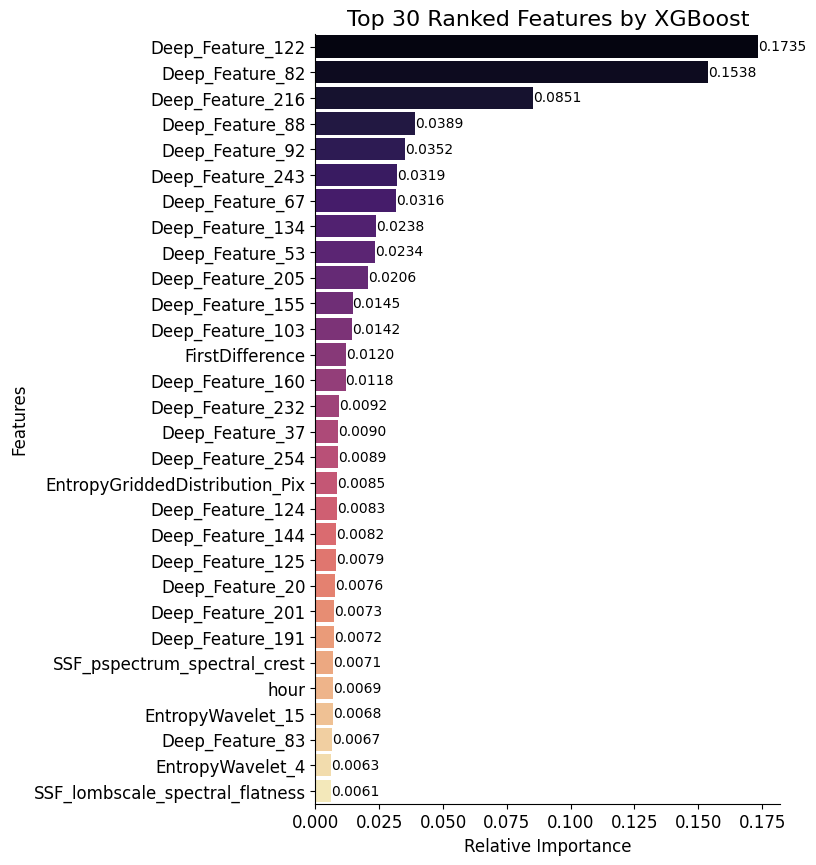

-----------------------------------------------------------------
Feature Ranking:
1. Feature no: 29 - Feature name: Deep_Feature_82 (0.061694)
2. Feature no: 76 - Feature name: Deep_Feature_103 (0.044274)
3. Feature no: 61 - Feature name: Deep_Feature_37 (0.042449)
4. Feature no: 58 - Feature name: Deep_Feature_27 (0.042201)
5. Feature no: 71 - Feature name: Deep_Feature_88 (0.036790)
6. Feature no: 89 - Feature name: Deep_Feature_155 (0.032761)
7. Feature no: 94 - Feature name: Deep_Feature_182 (0.028405)
8. Feature no: 46 - Feature name: EntropyBubble (0.019592)
9. Feature no: 98 - Feature name: Deep_Feature_199 (0.019485)
10. Feature no: 101 - Feature name: Deep_Feature_216 (0.017682)
11. Feature no: 48 - Feature name: EntropyGriddedDistribution_Pix (0.017185)
12. Feature no: 0 - Feature name: FirstDifference (0.016245)
13. Feature no: 63 - Feature name: Deep_Feature_48 (0.015294)
14. Feature no: 22 - Feature name: Deep_Feature_20 (0.014839)
15. Feature no: 25 - Feature name: Deep_

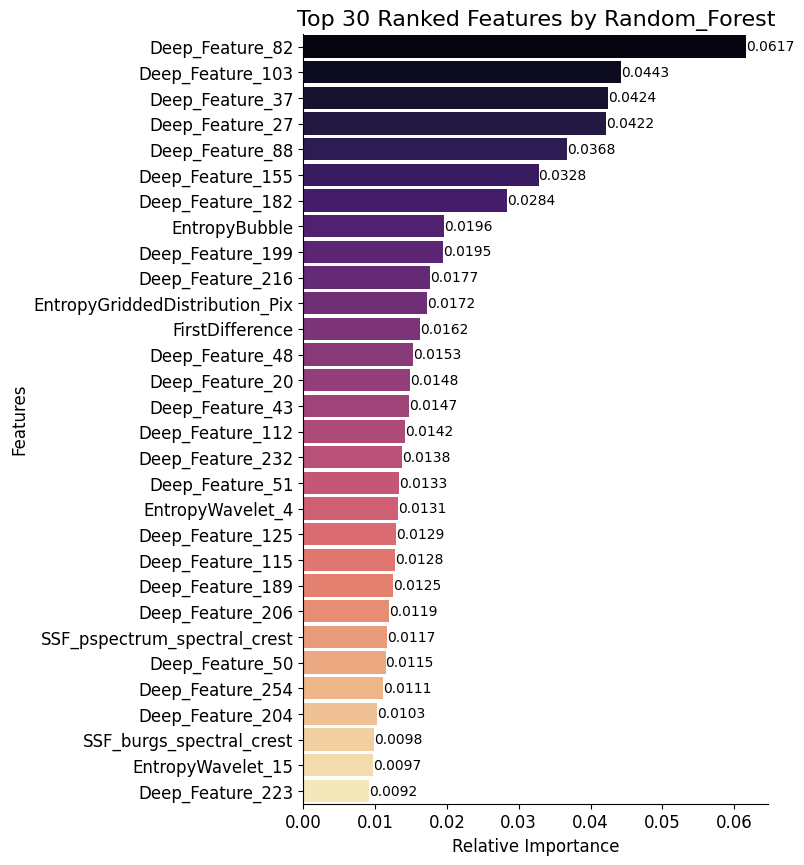

-----------------------------------------------------------------
Feature Ranking:
1. Feature no: 61 - Feature name: Deep_Feature_37 (0.032049)
2. Feature no: 89 - Feature name: Deep_Feature_155 (0.023518)
3. Feature no: 64 - Feature name: Deep_Feature_50 (0.021277)
4. Feature no: 73 - Feature name: Deep_Feature_91 (0.019458)
5. Feature no: 29 - Feature name: Deep_Feature_82 (0.018171)
6. Feature no: 58 - Feature name: Deep_Feature_27 (0.018135)
7. Feature no: 90 - Feature name: Deep_Feature_160 (0.017329)
8. Feature no: 63 - Feature name: Deep_Feature_48 (0.016870)
9. Feature no: 24 - Feature name: Deep_Feature_42 (0.016191)
10. Feature no: 35 - Feature name: Deep_Feature_114 (0.015779)
11. Feature no: 67 - Feature name: Deep_Feature_75 (0.015045)
12. Feature no: 14 - Feature name: EntropyWavelet_15 (0.014605)
13. Feature no: 22 - Feature name: Deep_Feature_20 (0.014424)
14. Feature no: 96 - Feature name: Deep_Feature_189 (0.013828)
15. Feature no: 107 - Feature name: Deep_Feature_254

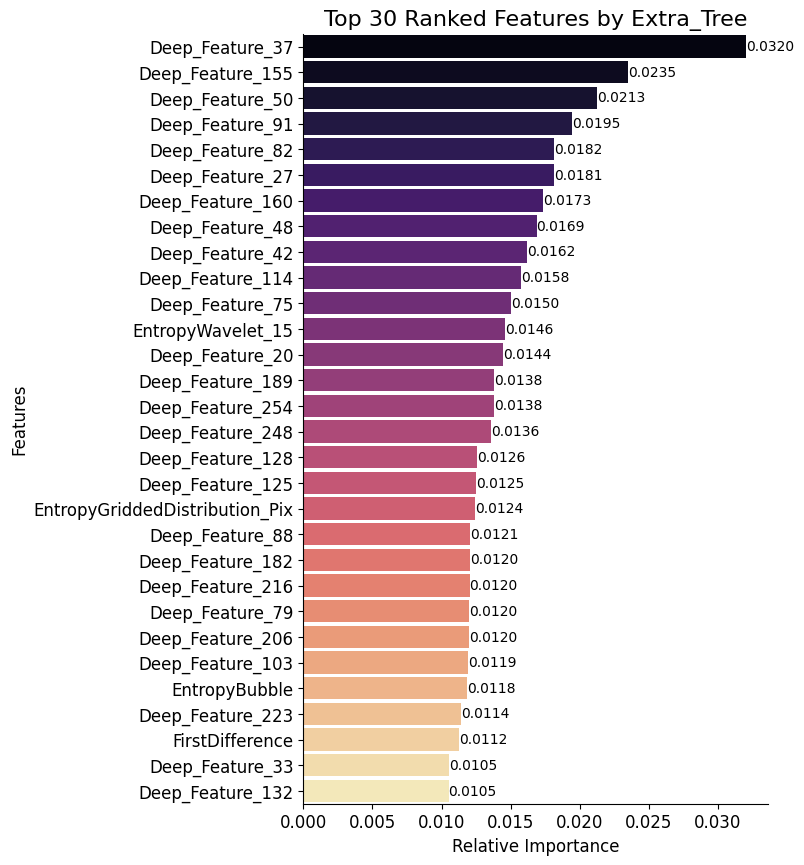

-----------------------------------------------------------------


In [8]:
optimized_features = pd.read_csv('Feature_Selected_Data_90.csv')
column_list = optimized_features.columns
X_All_Selected_Gen = X_All.reindex(labels=None, index=None, columns=column_list)
xgboost, randomforest, extratree = feature_ranking(X_All_Selected_Gen, Y_All)

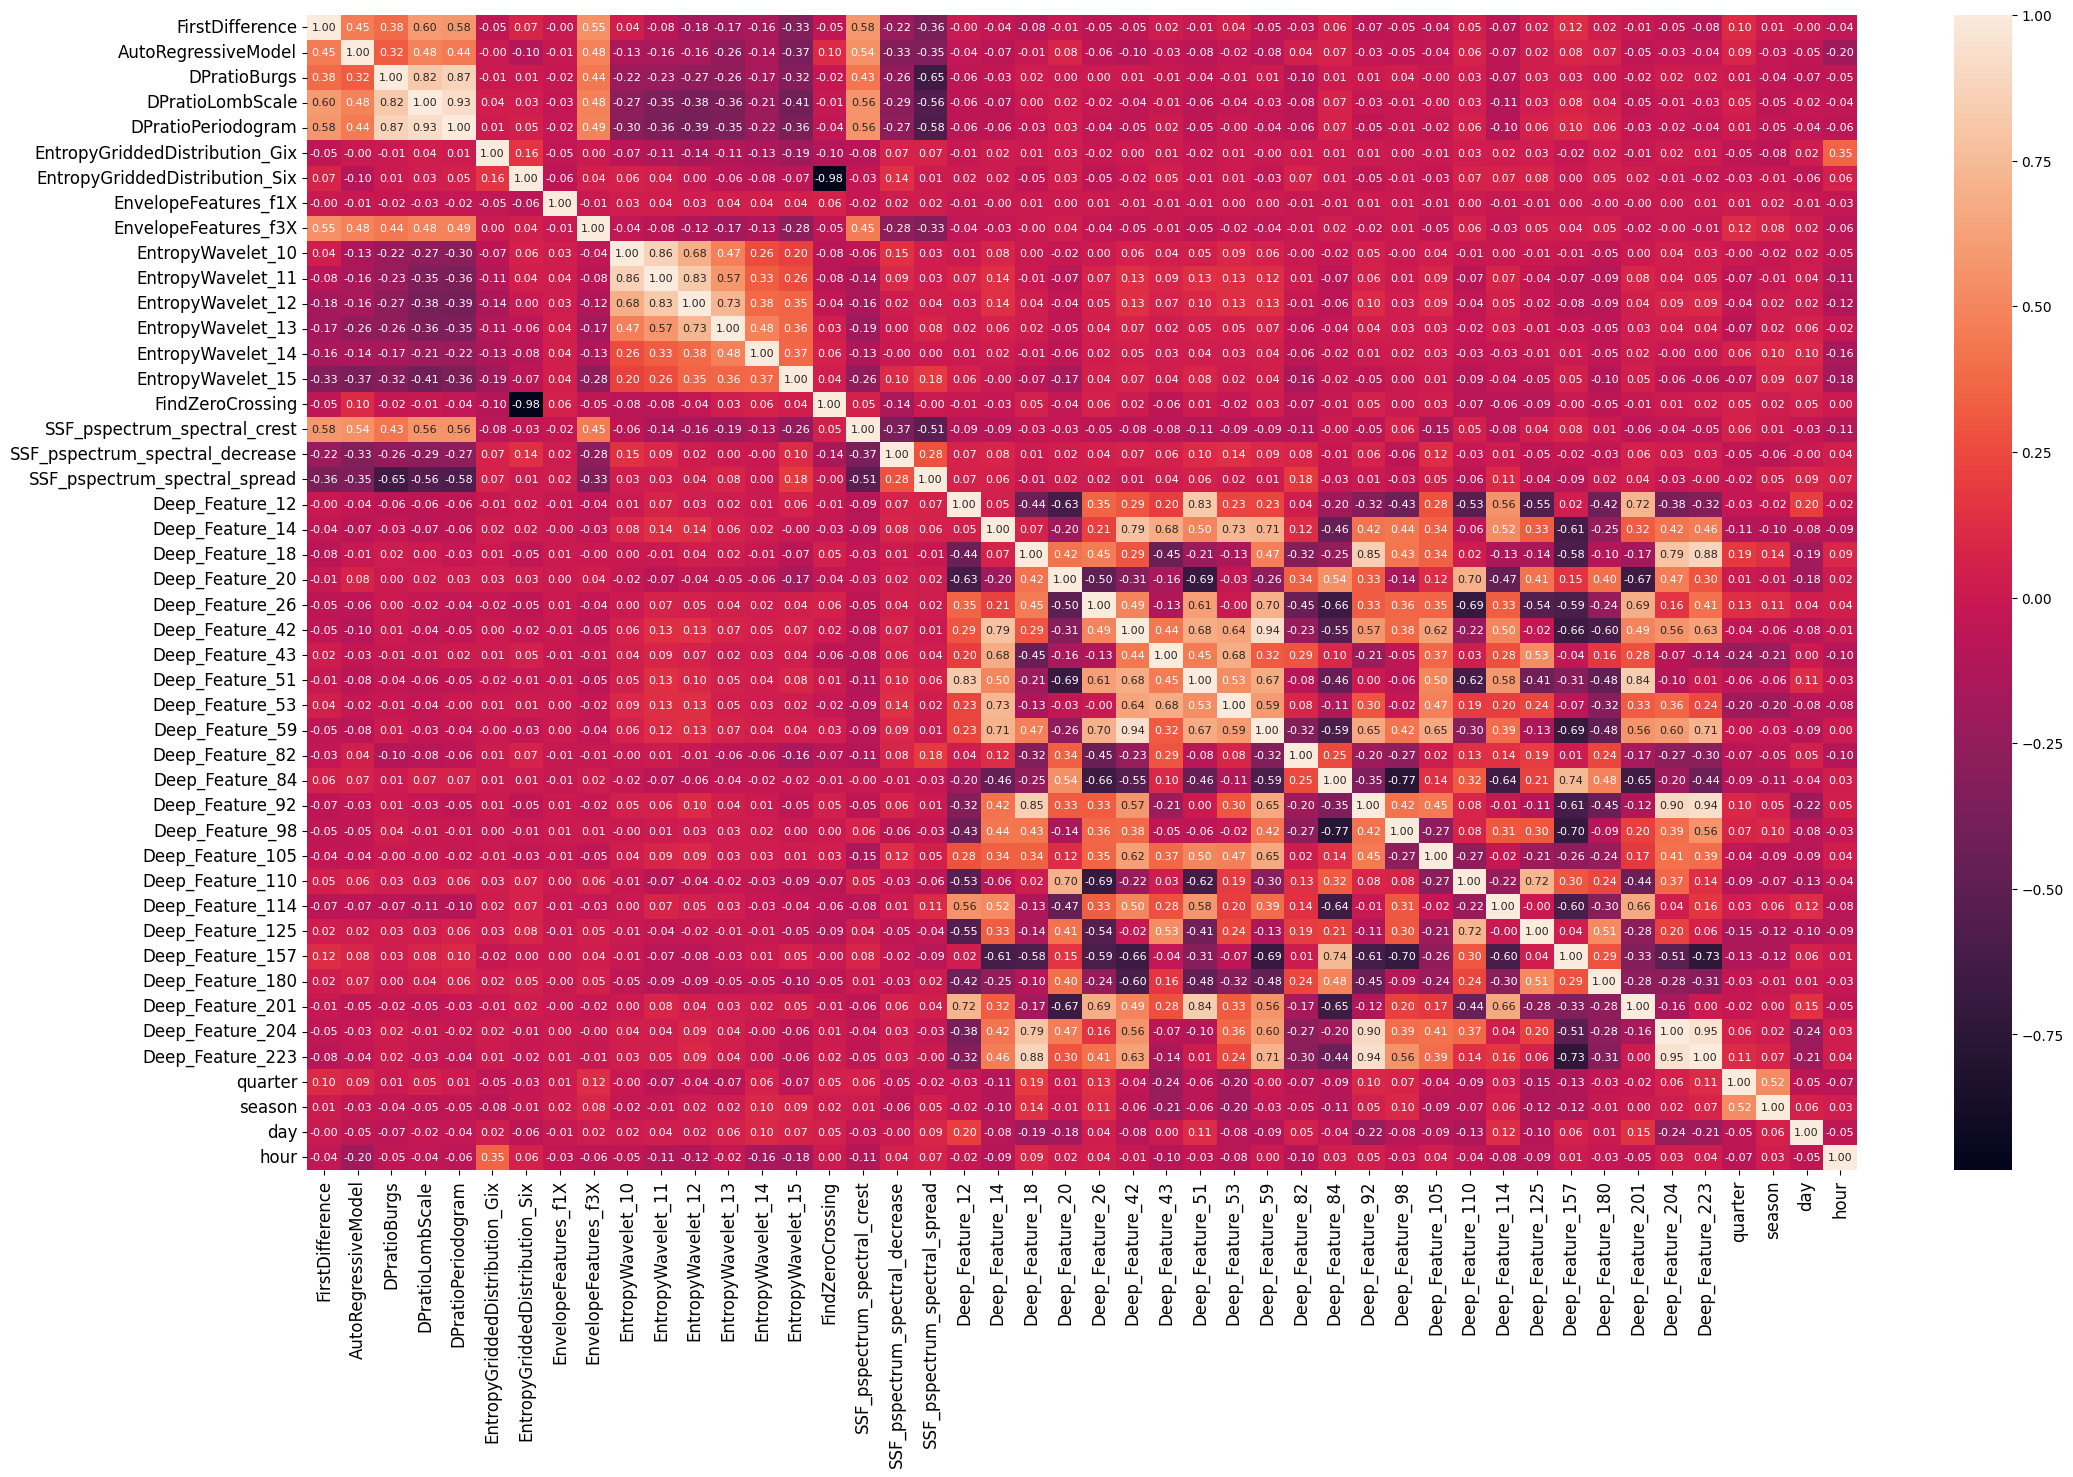

In [18]:
plt.subplots(figsize=(25, 15))
res = sns.heatmap(X_All_Selected_Gen.corr(), annot=True, annot_kws={"size": 8}, fmt='.2f')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize=12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize=12)
plt.savefig(f'Feature Correlation Matrix', transparent=False, bbox_inches='tight', dpi=600)

# Classify

Configurations

In [9]:
fold_num = 1
feature_num = X_All_Selected_Gen.shape[1]
feat_increment = 1 # increment feature numbers
feature_selection_model = randomforest # choose any of them [xgboost, randomforest, extratree]
classifier = 'all' # choose 'all' for all models
ensemble_type = 'Stacking' # choose any of them [Stacking, Voting, Bagging]

Load fold data and preprocess

In [10]:
# Prepare Train Features
train_features = pd.read_excel(f'Features_Train_Fold{fold_num}.xlsx', index_col=None)
X_Train = train_features.drop(['Target'], axis=1)
Labels = X_Train.columns
X_Train_Val = X_Train.values
X_Train_Val = min_max_scaler.fit_transform(X_Train_Val)
X_Train = pd.DataFrame(X_Train_Val, columns=Labels)
to_drop = [x for x in feature_selection_model if x not in Labels]
X_Train_Selected_Gen = X_Train.drop(to_drop, axis=1)
X_Train_Selected_Gen = X_Train_Selected_Gen.reindex(labels=None, index=None, columns=feature_selection_model)
Y_Train = train_features['Target']
# Prepare Test Features
test_features = pd.read_excel(f'Features_Test_Fold{fold_num}.xlsx', index_col=None)
X_Test = test_features.drop(['Target'], axis=1)
X_Test_Val = X_Test.values
X_Test_Val = min_max_scaler.fit_transform(X_Test_Val)
X_Test = pd.DataFrame(X_Test_Val, columns=Labels)
X_Test_Selected_Gen = X_Test.drop(to_drop, axis=1)
X_Test_Selected_Gen = X_Test_Selected_Gen.reindex(labels=None, index=None, columns=feature_selection_model)
Y_Test = test_features['Target']
# data_raw = missing_imputaion(x=data_raw, imputer='mice')
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_Train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_Train.columns.values]
print(X_Train_Selected_Gen.shape)
print(X_Test_Selected_Gen.shape)
print(Y_Train.shape)
print(Y_Test.shape)
X_Train_Selected_Gen.head(10)

(2821, 109)
(804, 109)
(2821,)
(804,)


,Deep_Feature_82,Deep_Feature_103,Deep_Feature_37,Deep_Feature_27,Deep_Feature_88,Deep_Feature_155,Deep_Feature_182,EntropyBubble,Deep_Feature_199,Deep_Feature_216,...,season,Deep_Feature_127,Deep_Feature_222,Deep_Feature_26,Deep_Feature_149,quarter,Deep_Feature_180,day,year,FindZeroCrossing
0,0.434092,0.424559,0.583421,0.572952,0.548585,0.593933,0.297640,0.835461,0.426996,0.454162,...,1.0,0.588782,0.526340,0.615497,0.432788,1.0,0.424417,0.0,0.0,0.0
1,0.467276,0.466901,0.556806,0.539921,0.509497,0.540306,0.332886,0.793941,0.462521,0.504750,...,1.0,0.539236,0.480028,0.519006,0.476934,1.0,0.466890,0.0,0.0,0.0
2,0.504512,0.487670,0.517072,0.502292,0.479817,0.520183,0.367518,0.744627,0.501293,0.518959,...,1.0,0.515988,0.471645,0.517394,0.506732,1.0,0.495689,0.0,0.0,0.0
3,0.526333,0.525190,0.480887,0.470938,0.464473,0.485163,0.376839,0.725912,0.530680,0.550710,...,1.0,0.511707,0.446054,0.478838,0.533603,1.0,0.519377,0.0,0.0,0.0
4,0.567757,0.566107,0.449863,0.440117,0.414253,0.449586,0.537346,0.678122,0.558618,0.600319,...,1.0,0.474206,0.420065,0.412362,0.574884,1.0,0.559392,0.0,0.0,0.0
5,0.604929,0.597062,0.427295,0.403734,0.381664,0.410399,0.425748,0.658320,0.605933,0.643360,...,1.0,0.445780,0.384501,0.408355,0.603996,1.0,0.585041,0.0,0.0,0.0
6,0.625673,0.628593,0.377574,0.369811,0.376921,0.378493,0.355182,0.649824,0.636360,0.652646,...,1.0,0.418229,0.358141,0.378194,0.638506,1.0,0.617966,0.0,0.0,0.0
7,0.667674,0.661251,0.355664,0.332777,0.323905,0.352402,0.480205,0.601488,0.666809,0.702566,...,1.0,0.391038,0.308252,0.354926,0.674892,1.0,0.652464,0.0,0.0,0.0
8,0.695791,0.693094,0.320704,0.302676,0.281083,0.321855,0.456654,0.583234,0.691857,0.712451,...,1.0,0.335691,0.271105,0.351979,0.701886,1.0,0.687716,0.0,0.0,0.0
9,0.728974,0.735436,0.294088,0.269645,0.241995,0.268229,0.491899,0.572614,0.727382,0.763038,...,1.0,0.286145,0.224793,0.255488,0.746031,1.0,0.730189,0.0,0.0,0.0


Train and Evaluate Individual Models

In [ ]:
# Classification with top features
Result, prb, tar, pred = classification_with_top_feature(X_Train_Selected_Gen,
                                                        Y_Train,
                                                        X_Test_Selected_Gen,
                                                        Y_Test,
                                                        feature_num,
                                                        feature_selection_model,
                                                        classifier,
                                                        feat_increment)

Train and Evaluate Ensembled Models

In [11]:
Result_Stack, tar_Stack, pred_Stack = classification_ensembled(X_Train_Selected_Gen,
                                                                        Y_Train,
                                                                        X_Test_Selected_Gen,
                                                                        Y_Test,
                                                                        feature_num,
                                                                        feature_selection_model,
                                                                        feat_increment,
                                                                        ensemble_type=ensemble_type)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
---------------------------------------------------------------------
Result for Stacking Classifier
---------------------------------------------------------------------
                  Accuracy  Precision  Recall  F1-Score  Specificity
top_1_feature        87.56      88.07   87.56     87.58        88.20
top_2_features       87.81      88.32   87.81     87.83        88.46
top_3_features       87.81      88.36   87.81     87.82        88.49
top_4_features       87.56      88.03   87.57     87.58        88.17
top_5_features       87.81      88.36   87.81     87.82        88.49
...                    ...        ...     ...       ...          ...
top_105_features    

Plot

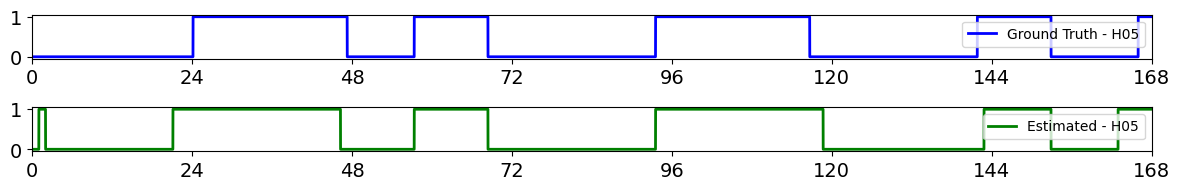

In [21]:
# Configurations
start_point = 600
end_point = 768
length = end_point - start_point
# Data (Interpolate)
lspace_org = np.linspace(start_point, end_point, num=length)
x = Y_Test[start_point: end_point]
lspace_new = np.linspace(start_point, end_point, num=length*1000)
xnew = np.int_(np.interp(lspace_new, lspace_org, x))
y = pred_Stack[70][start_point: end_point]
ynew = np.int_(np.interp(lspace_new, lspace_org, y))
# Plot   
plt.figure(figsize=(12,2))
plt.subplot(2,1,1)
plt.plot(xnew[0:], 'b', label='Ground Truth - H05', linewidth=2)
plt.legend(fontsize=10, loc='upper right')
plt.tick_params(labelsize=14)
plt.xlim([0, length*1000])
plt.xticks(np.arange(0, length*1000 + 1000, step=24000), labels=np.arange(0, length+1, step=24))
plt.tight_layout()
plt.subplot(2,1,2)
plt.plot(ynew[0:], 'g', label='Estimated - H05', linewidth=2)
plt.legend(fontsize=10, loc='upper right')
plt.tick_params(labelsize=14)
plt.tight_layout()
plt.xticks(np.arange(0, length*1000 + 1000, step=24000), labels=np.arange(0, length+1, step=24))
plt.xlim([0, length*1000])
# Save
plt.savefig(f'Pulse Wave 4', bbox_inches='tight', dpi=600)